In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
bdi = pd.read_csv('BDI.csv')[['ReDate', 'ReValue']]
cos = pd.read_csv('COSCO.csv')[['ReDate', 'ReClose']]

In [3]:
bdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ReDate   86 non-null     object
 1   ReValue  86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [4]:
cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ReDate   86 non-null     object 
 1   ReClose  86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [5]:
bdi.head()

,ReDate,ReValue
0,2021/3/16,2017
1,2021/3/17,2105
2,2021/3/18,2215
3,2021/3/19,2281
4,2021/3/22,2319


In [6]:
cos.head()

,ReDate,ReClose
0,2021/3/16,11.41
1,2021/3/17,12.55
2,2021/3/18,12.96
3,2021/3/19,12.57
4,2021/3/22,13.01


In [7]:
date = bdi['ReDate'].to_numpy()[:-5]
y_bdi = bdi['ReValue'].to_numpy()[:-5]
y_cos = cos['ReClose'].to_numpy()[:-5]

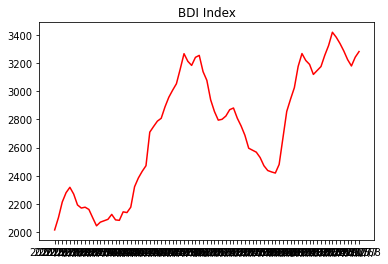

In [8]:
plt.plot(date, y_bdi, c='red')
plt.title('BDI Index')
plt.show()

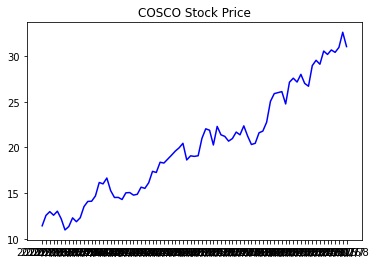

In [9]:
plt.plot(date, y_cos, c='blue')
plt.title('COSCO Stock Price')
plt.show()

In [10]:
# Correlation
np.corrcoef(y_cos, y_bdi)[0, 1]

0.7923452216794457

In [11]:
# Rescale and X axis
r_bdi = (y_bdi - min(y_bdi)) / (max(y_bdi) - min(y_bdi))
r_cos = (y_cos - min(y_cos)) / (max(y_cos) - min(y_cos))
X = []
for i in range(len(date)):
    if i == 0:
        X.append(date[i])
    elif i == 20:
        X.append(date[i])
    elif i == 40:
        X.append(date[i])
    elif i == 60:
        X.append(date[i])
    elif i == 80:
        X.append(date[i])
    else:
        X.append('')

In [12]:
# Linear regression model
lr = LinearRegression()
lr.fit(r_bdi.reshape(-1,1), r_cos)
print(lr.intercept_)
print(lr.coef_[0])

def Price(x):
    return lr.intercept_ + lr.coef_[0] * x

0.0732751441006908
0.6934665318850162


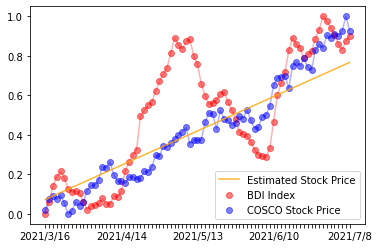

In [14]:
plt.scatter(date, r_bdi, c='red', alpha=0.5, label='BDI Index')
plt.plot(date, r_bdi, c='red', alpha=0.3)
plt.scatter(date, r_cos, c='blue', alpha=0.5, label='COSCO Stock Price')
plt.plot(date, r_cos, c='blue', alpha=0.3)
plt.plot(date, Price(np.linspace(0, 1, 81)), c='orange', alpha=0.8, label='Estimated Stock Price')
plt.legend()
plt.xticks(date, X)
plt.savefig('cosco-bdi.pdf')
plt.show()